In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from tensorflow import keras
from tensorflow.keras.utils import to_categorical # to One-Hot-Code values
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D # create convolutional layer
from keras.models import Model
import matplotlib.pyplot as plt # plotting graphs for visual analysis
from sklearn.model_selection import train_test_split #splitting dataset
%matplotlib inline

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
print(train_df.shape)
print(test_df.shape)

(42000, 785)
(28000, 784)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
#Separating labels and pixel values
X_train = train_df.drop('label',axis=1)
y_train = train_df['label']

In [ ]:
print(X_train.shape)
print(y_train.shape)

(42000, 784)
(42000,)


In [ ]:
#Normalizing data
X_train = X_train/255.
test_df = test_df/255.

In [ ]:
image_train, image_val, label_train, label_val = train_test_split(X_train, y_train,
                                        test_size=0.1, random_state=44)

In [ ]:
image_train.shape

(37800, 784)

In [ ]:
label_train.shape

(37800,)

In [ ]:
# Build and fit the Logistic Regression model
log_reg = LogisticRegression( C=0.1, solver='sag', random_state=4, verbose=1)
log_reg.fit(image_train, label_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 43 epochs took 55 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.1s finished


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4, solver='sag', tol=0.0001, verbose=1,
                   warm_start=False)

In [ ]:
y_pred = log_reg.predict(image_val)

In [ ]:
# Evaluate the Model Accuracy

# Comparing y test to y predict
print("Logistic Regression Model Accuracy (after tuning solver) on test data: ", metrics.accuracy_score(label_val, y_pred))

Logistic Regression Model Accuracy (after tuning solver) on test data:  0.9207142857142857


In [ ]:
test_result = log_reg.predict(test_df)

NameError: ignored

In [ ]:
# For NN model
# reshape images into 28*28*1 (-1 takes value as it is) for NN

x_train = X_train.values.reshape(-1, 28, 28, 1)
tesT_df=test_df.values.reshape(-1, 28, 28, 1)

In [ ]:
y_cat = to_categorical(y_train)

In [ ]:
image_train, image_val, label_train, label_val = train_test_split(x_train, y_cat,
                                        test_size=0.1, random_state=44)

In [ ]:
model=Sequential()

model.add(Conv2D(64, (3,3), 
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3),
                activation='relu',
                input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3),
                activation='relu',
                input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

#2. Create 2 Dense layers, one is hidden and other is for prediction(output)
#Flatten(convert 2D to 1D array) the results for Dense Neural Network
model.add(Flatten())
#model.add(Dropout(0.25))

#Add a dense layer to recognize and define pixel patterns
model.add(Dense(256, activation='relu'))

#Add another dense layer to identify and find probability of class 0-9
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 64)         

In [ ]:
model.compile(loss='categorical_crossentropy',
                optimizer='Adam',    #rmsprop
                metrics=['accuracy'])

In [ ]:
epochs=5
batch_size=64

In [ ]:
history=model.fit(image_train,label_train,
                  batch_size=batch_size, epochs=epochs,
                  validation_data = (image_val, label_val),
                  verbose=2)

Epoch 1/5
591/591 - 45s - loss: 0.3876 - accuracy: 0.8798 - val_loss: 0.1657 - val_accuracy: 0.9493
Epoch 2/5
591/591 - 44s - loss: 0.1367 - accuracy: 0.9591 - val_loss: 0.0944 - val_accuracy: 0.9719
Epoch 3/5
591/591 - 44s - loss: 0.1005 - accuracy: 0.9697 - val_loss: 0.0673 - val_accuracy: 0.9802
Epoch 4/5
591/591 - 44s - loss: 0.0804 - accuracy: 0.9752 - val_loss: 0.0633 - val_accuracy: 0.9812
Epoch 5/5
591/591 - 44s - loss: 0.0691 - accuracy: 0.9790 - val_loss: 0.0632 - val_accuracy: 0.9845


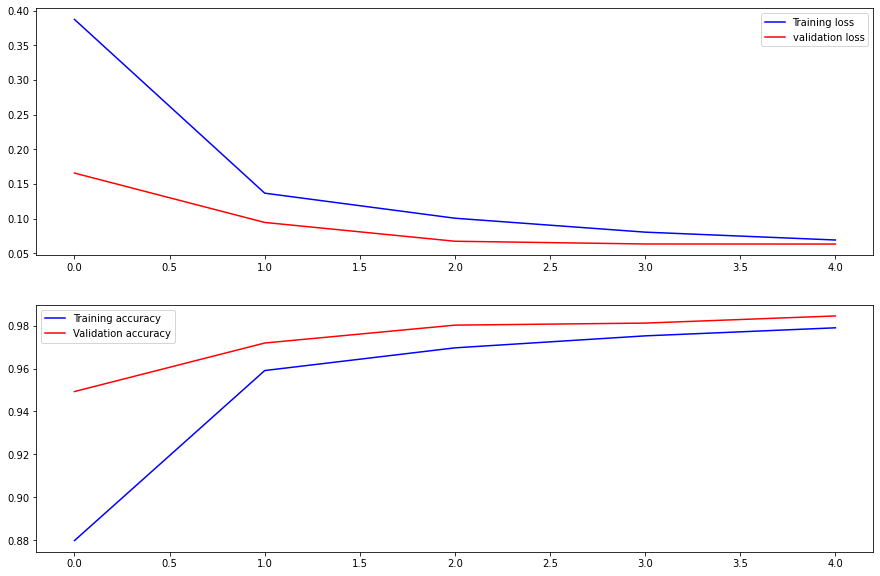

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(15, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss")
ax[0].legend()

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].legend()